In [67]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Imputer
from sklearn.metrics import confusion_matrix
from subprocess import check_output
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re
import matplotlib.pyplot as plt
import graphviz
import pydotplus


In [17]:
train = pd.read_csv("../input/train.csv")

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
train['Sex'][train.Sex == 'female'] = 1
train['Sex'][train.Sex == 'male'] = 0

C:\Users\Iustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Iustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C


In [21]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
columns = ['Pclass','Sex','Age','Fare','Parch','SibSp']
for col in columns:
    train[col] = imp.fit_transform(train[col].values.reshape(-1,1))

In [22]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [24]:
X = train[columns]
y = train.Survived

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train,y_train)
print('Accuracy using the defualt gini impurity criterion...',clf.score(X_test,y_test))

clf = DecisionTreeClassifier(max_depth = 3, criterion = "entropy")
clf.fit(X_train,y_train)
print('Accuracy using the entropy criterion...',clf.score(X_test,y_test))

Accuracy using the defualt gini impurity criterion... 0.8203389830508474
Accuracy using the entropy criterion... 0.8203389830508474


In [27]:
t = time.time()
clf = DecisionTreeClassifier(max_depth = 3, splitter = 'best')
clf.fit(X_train,y_train)
print('Best Split running time...',time.time() - t)
print('Best Split accuracy...',clf.score(X_test,y_test))

t = time.time()
clf = DecisionTreeClassifier(max_depth = 3, splitter = 'random')
clf.fit(X_train,y_train)
print('Random Split running time...',time.time() - t)
print('Random Split accuracy...',clf.score(X_test,y_test))

Best Split running time... 0.0
Best Split accuracy... 0.8203389830508474
Random Split running time... 0.0009975433349609375
Random Split accuracy... 0.7728813559322034


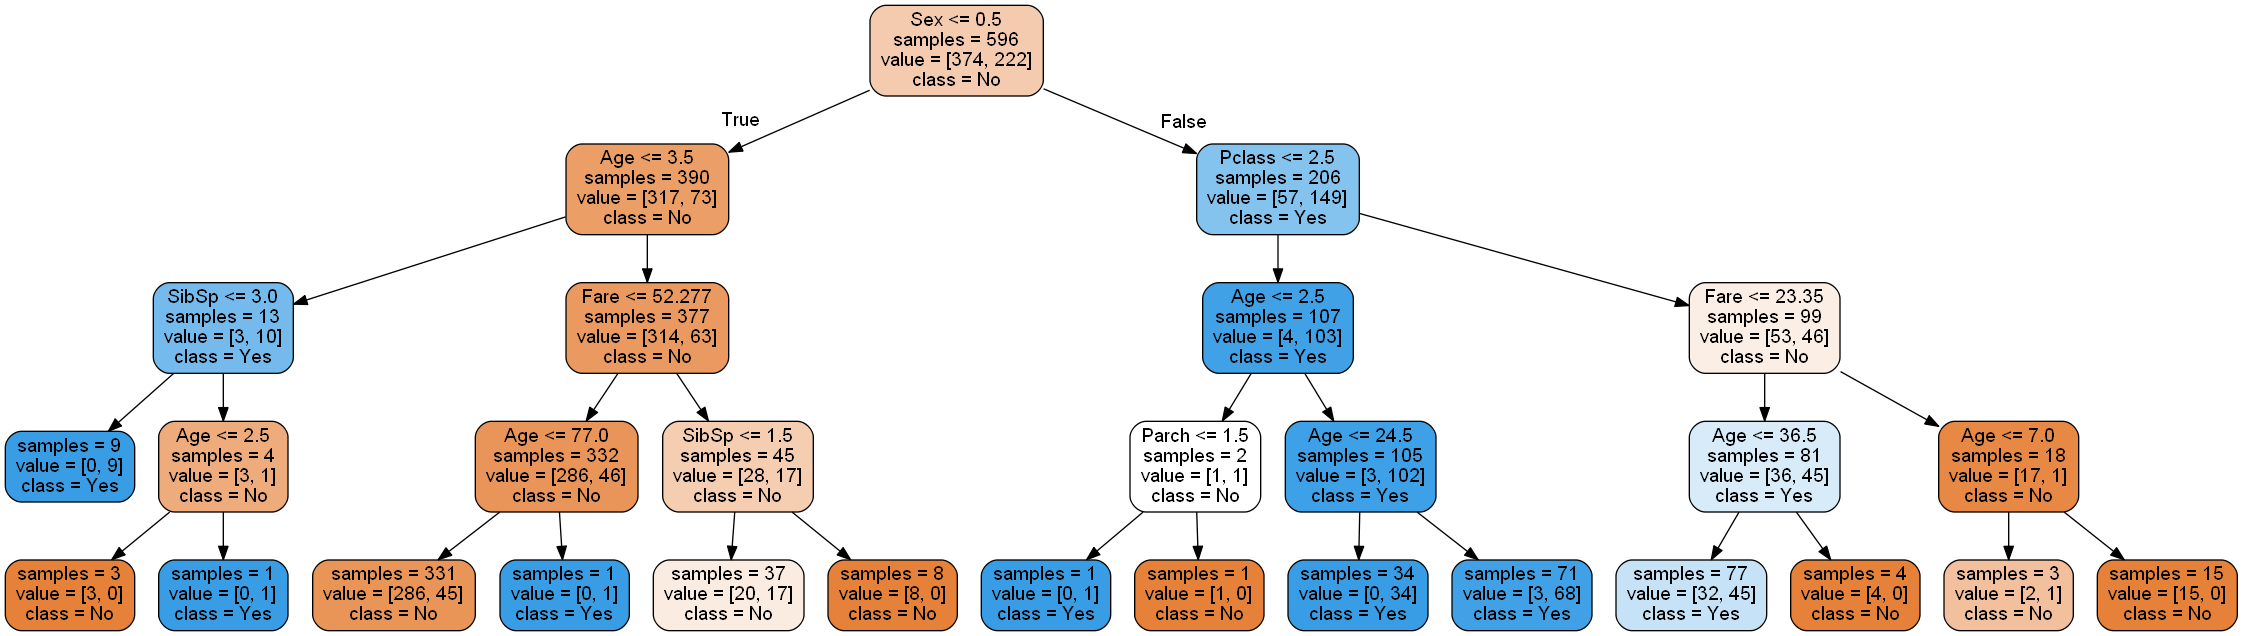

In [78]:
clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(X_train,y_train)

with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(clf,
                              out_file=f,
                              max_depth = 5,
                              impurity = False,
                              feature_names = X_test.columns.values,
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= True )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png")

In [35]:
with open('tree1.dot', 'rb') as f:
      contents = f.read()

In [36]:
contents

b'digraph Tree {\r\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\r\nedge [fontname=helvetica] ;\r\n0 [label="Sex <= 0.607\\nsamples = 596\\nvalue = [374, 222]\\nclass = No", fillcolor="#e5813968"] ;\r\n1 [label="Pclass <= 1.851\\nsamples = 390\\nvalue = [317, 73]\\nclass = No", fillcolor="#e58139c4"] ;\r\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\r\n2 [label="Fare <= 331.226\\nsamples = 76\\nvalue = [52, 24]\\nclass = No", fillcolor="#e5813989"] ;\r\n1 -> 2 ;\r\n3 [label="samples = 74\\nvalue = [52, 22]\\nclass = No", fillcolor="#e5813993"] ;\r\n2 -> 3 ;\r\n4 [label="samples = 2\\nvalue = [0, 2]\\nclass = Yes", fillcolor="#399de5ff"] ;\r\n2 -> 4 ;\r\n5 [label="Parch <= 0.379\\nsamples = 314\\nvalue = [265, 49]\\nclass = No", fillcolor="#e58139d0"] ;\r\n1 -> 5 ;\r\n6 [label="samples = 265\\nvalue = [230, 35]\\nclass = No", fillcolor="#e58139d8"] ;\r\n5 -> 6 ;\r\n7 [label="samples = 49\\nvalue = [35, 14]\\nclass = No", fillcolor="#e58

In [75]:
graph.